## Exploring IMBD's Top 250 Movies (August 2024)

- IMDB Top 250: [https://www.imdb.com/chart/top/](https://www.imdb.com/chart/top/)
- Dataset: [https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv](https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv)

In [1501]:
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import html
import httpx
from matplotlib.ticker import FuncFormatter

In [1242]:
data = pd.read_csv("IMDB_Top250.csv", index_col=[0])

In [1243]:
data.head(2)

,url,name,image,description,rating,rating_count,content_rating,genre,keywords,actors,...,release_date,rank,added_by,budget_amount,budget_currency,gross_amount,gross_currency,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
0,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2934407,R,['Drama'],"prison,based on the works of stephen king,esca...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",...,1994-10-14,1,1500000,25000000.0,USD,28767189.0,USD,Oscar,0.0,7.0
1,https://www.imdb.com/title/tt0068646/,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,"Don Vito Corleone, head of a mafia family, dec...",9.2,2045292,R,"['Crime', 'Drama']","mafia,patriarch,crime family,organized crime,g...","['Marlon Brando', 'Al Pacino', 'James Caan']",...,1972-03-24,2,1300000,6000000.0,USD,136381073.0,USD,Oscar,3.0,8.0


## Preprocessing

Let's take care of the date column:

In [1246]:
data["release_date"] = pd.to_datetime(data["release_date"])

Finally, let's take care of some unescaped characters:

In [1247]:
data["name"] = data["name"].apply(html.unescape)

## Global Chart Styles

In [588]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.autolayout'] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlepad"] = 40

## Films

With rank taken into account:

In [1248]:
top_films_rank = data[["rank", "name", "rating"]].drop_duplicates().sort_values(
    by=["rank", "rating"], 
    ascending=[True, False]
).head(10)

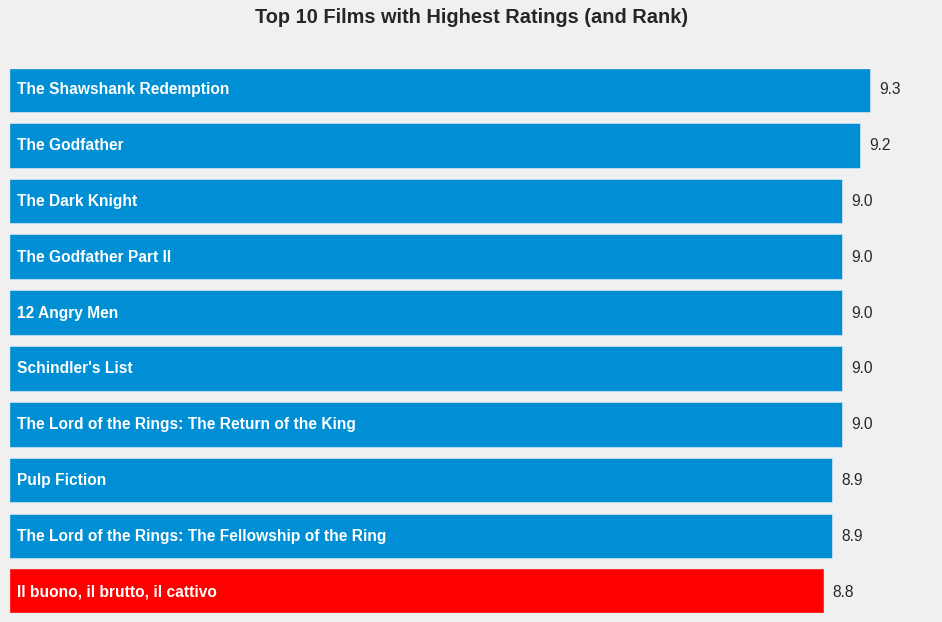

In [1249]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rank['name'], top_films_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings (and Rank)")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-rank.png")
plt.show()

Without rank taken into account:

In [1250]:
top_films_no_rank = data[["name", "rating", "rank"]].drop_duplicates().sort_values(
    by="rating",
    ascending=False
).head(10).reset_index()

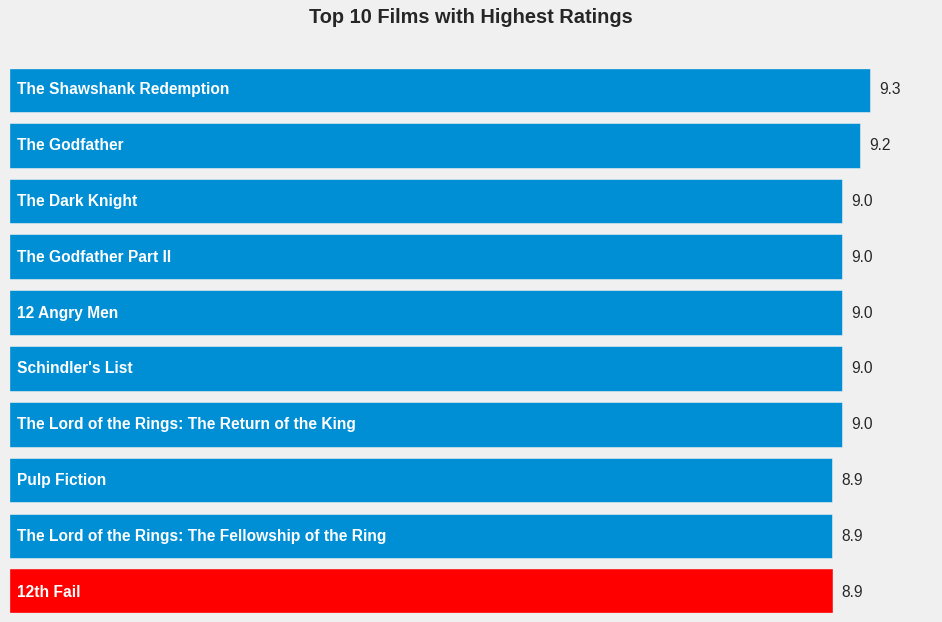

In [1251]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_no_rank['name'], top_films_no_rank['rating'])
ax.set_title("Top 10 Films with Highest Ratings")
ax.invert_yaxis()
ax.set_xticks([])


bars[-1].set_color("red")
ax.get_yticklabels()[-1].set_color("red")

ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{width:.1f}',  
            ha="left", va="center")
    
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(0.1,
            y_position,
            top_films_no_rank["name"][idx],
            ha="left", va="center",  
            color="white",
            fontweight='bold')  



plt.savefig("top-10-no-rank.png")
plt.show()

`12th Fail` has a higher ranking (8.9) than `Il buono, il brutto, il cattivo` but less ratings (`127k` vs `883k`), which is why IMDB is placing it lower

Most ratings

In [1252]:
top_films_rating_count = data[["name", "rank", "rating_count"]].sort_values(
    by="rating_count",
    ascending=False
).head(10).reset_index(drop=True)

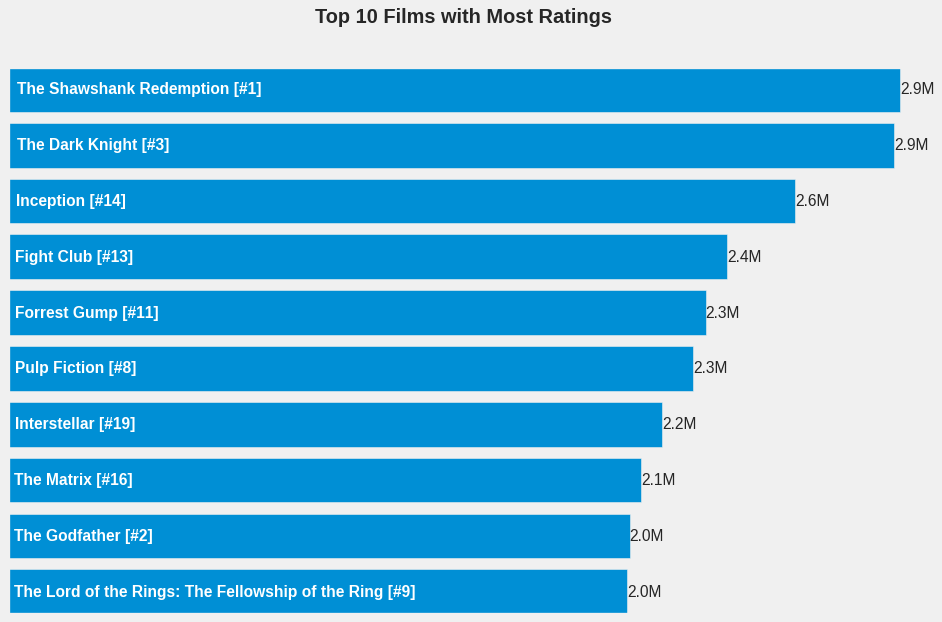

In [1730]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_films_rating_count['name'], top_films_rating_count['rating_count'])
ax.set_title("Top 10 Films with Most Ratings")
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{top_films_rating_count["name"][idx]} [#{top_films_rating_count["rank"][idx]}]',
            ha="left", va="center",  
            color="white",
            fontweight='bold')  

    ax.text(width * 1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{top_films_rating_count["rating_count"][idx]/ 1_000_000:.1f}M',  
            ha="left", va="center")
    
    
plt.savefig("top-10-most-ratings.png")
plt.show()

Most of the films with the highest number of votes also rank among the top-rated ones.

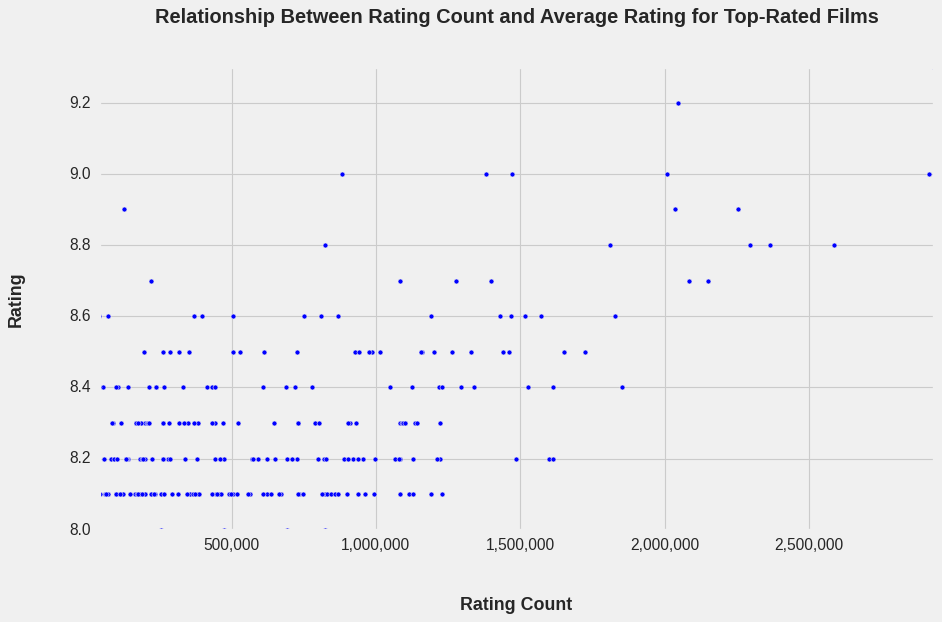

In [1465]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=True)
bars = ax.scatter(x=data['rating_count'], y=data['rating'])
ax.set_title("Relationship Between Rating Count and Average Rating for Top-Rated Films")
ax.set_ylabel("Rating", labelpad=40)
ax.set_xlabel("Rating Count", labelpad=40)
ax.set_xlim([data["rating_count"].min(), data["rating_count"].max()])
ax.set_ylim([data["rating"].min(), data["rating"].max()])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x:,.0f}"))
plt.savefig("rating-count-vs-rating.png")
plt.show()

## Decades

In [1534]:
decades_data = data[["release_year", 
                     "name",
                     "rating_count",
                     "rating",
                     "reviews",
                     "added_by",
                     "metascore",
                     "wins",
                     "nominations",
                     "content_rating",
                     "credits",
                    ]].copy()
decades_data["decade"] = data["release_year"].apply(lambda x: (x // 10) * 10)
decades_data = decades_data.groupby("decade").agg({
    "name": "count",
    "rating": "mean",
    "rating_count": "mean",
    "reviews": "sum",
    "added_by": "sum",
    "metascore": "mean",
    "wins": "mean",
    "nominations": "mean",
    "content_rating": "count",
    "credits": "mean"
})

Rating counts trend over time

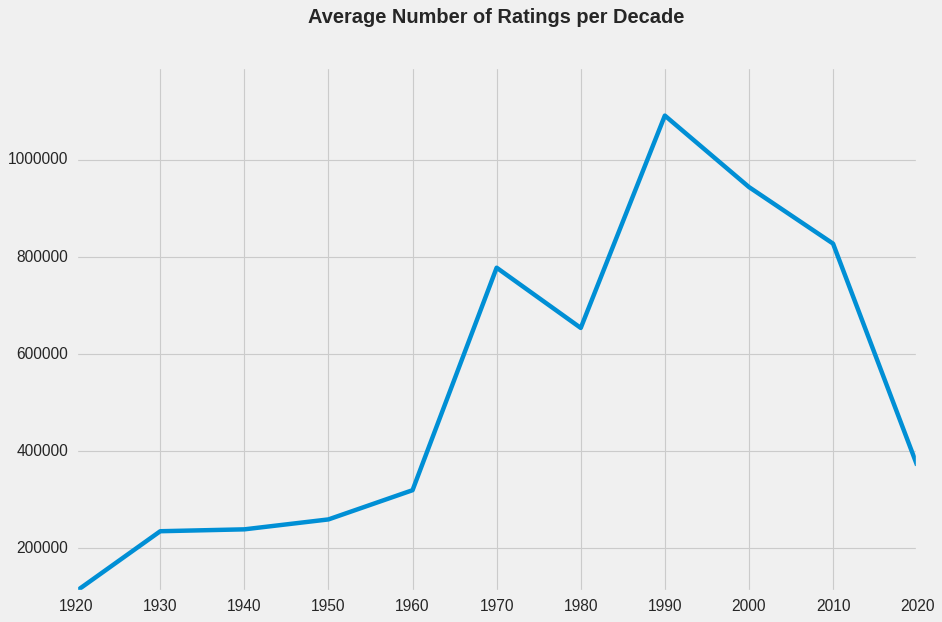

In [1467]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating_count"], label='Average Rating Count')
ax.set_title("Average Number of Ratings per Decade")
ax.set_ylim([decades_data["rating_count"].min(), decades_data["rating_count"].max() + 100000])
plt.savefig("rating-count-trend.png")
plt.show()

Average rating per decade over time

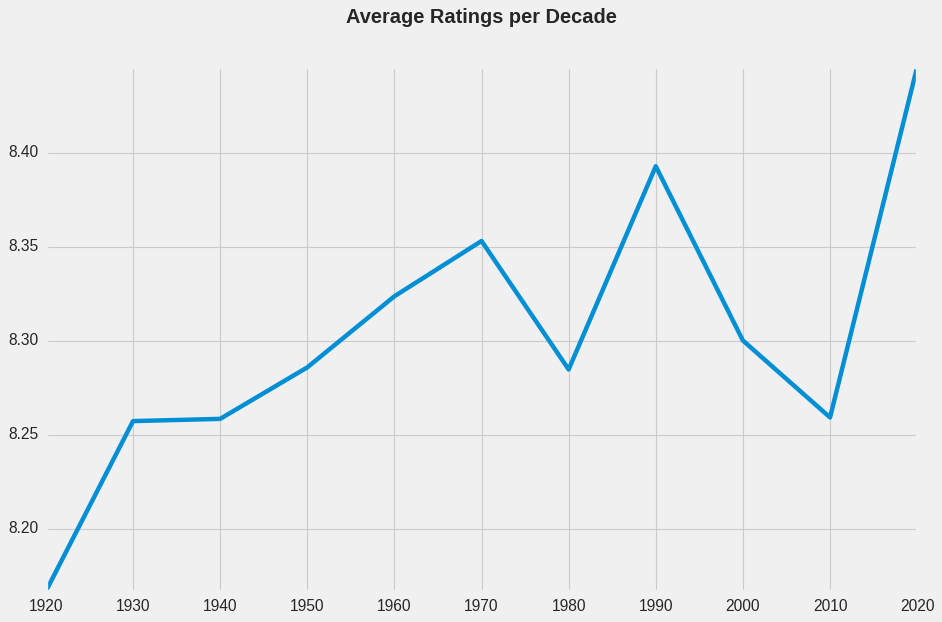

In [1468]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], label='Average Rating')
ax.set_title("Average Ratings per Decade")
ax.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])

plt.savefig("avg-ratings-per-decade.png")
plt.show()

## Strongest Decades

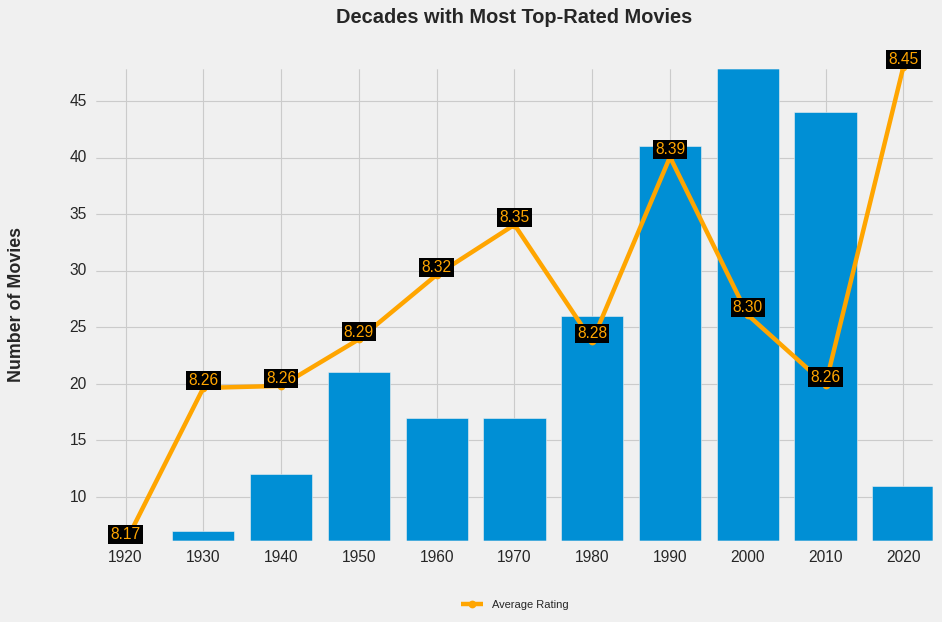

In [1472]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["name"])
ax2 = ax1.twinx()

points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.set_title("Decades with Most Top-Rated Movies")
ax1.set_ylabel("Number of Movies", labelpad=40)
ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
ax2.set_yticks([])

for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )
plt.savefig("strongest-decades.png")
plt.show()

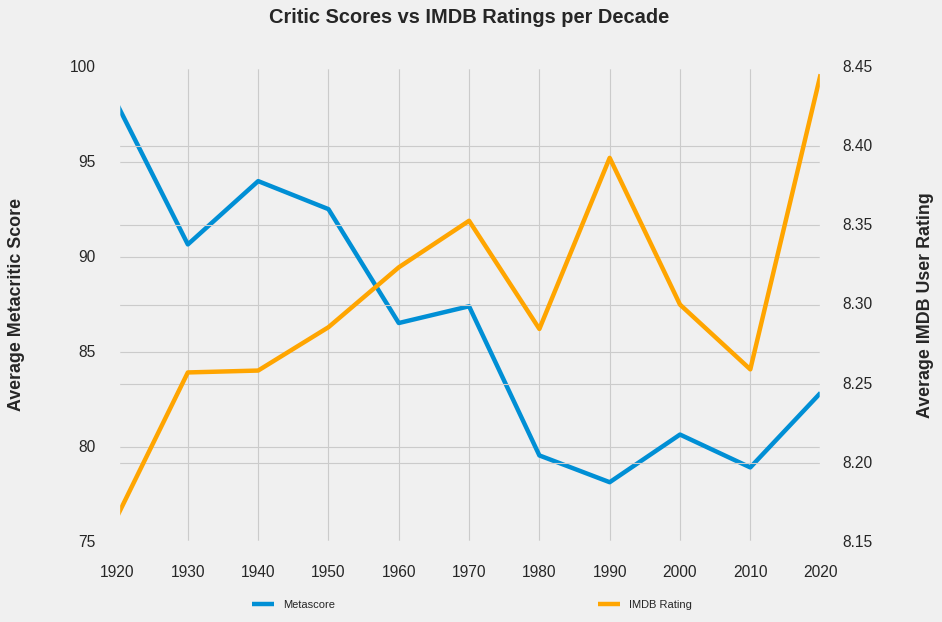

In [1475]:
fig, ax1 = plt.subplots(figsize=(12, 8))
metascore = ax1.plot(decades_data.index.astype(int).astype(str), decades_data["metascore"], label="Metascore")

ax2 = ax1.twinx()
ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  # Increase padding on the x-axis
ax1.tick_params(axis='y', pad=20)  # Increase padding on the y-axis for ax1
ax2.tick_params(axis='y', pad=20) 

ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.1), ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.75, -0.1), ncol=1)

ax1.set_title("Critic Scores vs IMDB Ratings per Decade")
ax1.set_ylabel("Average Metacritic Score", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

# points = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"].values, c="orange", marker='o', linestyle='-', label="Average Rating")
# ax1.set_title("Years With Most IMDB 250 Movies")
# ax1.set_ylabel("Number of Movies", labelpad=40)
# ax1.set_ylim([decades_data["name"].min(), decades_data["name"].max()])
# ax2.set_ylim([decades_data["rating"].min(), decades_data["rating"].max()])
# ax2.set_yticks([])

# for x, y in zip(decades_data.index.astype(int).astype(str), decades_data["rating"].values):
#     ax2.text(
#         x,
#         y,
#         f"{y:.2f}",
#         va='bottom',
#         ha='center',
#         fontsize=14,
#         color='orange',
#         bbox=dict(facecolor='black', edgecolor='none', pad=2)
#     )
plt.savefig("critics-vs-user-ratings.png")
plt.show()

## Critics' Favorites

In [1566]:
data[["name", "release_year", "metascore", "rating"]].sort_values(by="metascore", ascending=False).head(10)

,name,release_year,metascore,rating
98,Lawrence of Arabia,1962,100.0,8.3
107,Vertigo,1958,100.0,8.3
210,Tôkyô monogatari,1953,100.0,8.1
51,Rear Window,1954,100.0,8.5
104,Citizen Kane,1941,100.0,8.3
1,The Godfather,1972,100.0,9.2
46,Casablanca,1942,100.0,8.5
87,Singin' in the Rain,1952,99.0,8.3
53,City Lights,1931,99.0,8.5
145,El laberinto del fauno,2006,98.0,8.2


## Wins & Nominations

In [1710]:
most_wins_noms = data[["name", "release_year", "wins", "nominations", "rating", "prestigious_award_type", "prestigious_award_wins", "prestigious_award_nominations"]].reset_index(drop=True).sort_values(by=["wins", "nominations"], ascending=False).head(10)

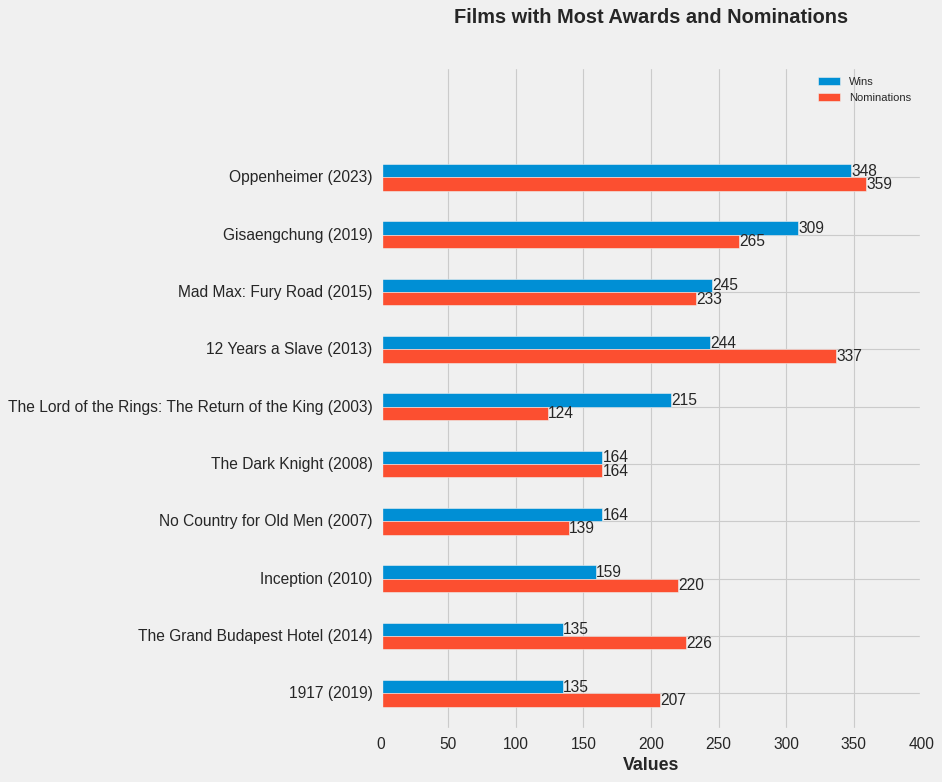

In [1711]:
categories = ['Wins', 'Nominations']

wins = ax.barh(most_wins_noms["name"], most_wins_noms["wins"], label='Wins')
noms = ax.barh(most_wins_noms["name"], most_wins_noms["nominations"], label='Nominations')

categories = ['Wins', 'Nominations']
n_categories = len(categories)
bar_width = 0.6
spacing = 2 
index = np.arange(len(most_wins_noms["name"])) * (bar_width + spacing)

fig, ax = plt.subplots(figsize=(12, 10))

# Plot bars
wins = ax.barh(index - bar_width/2, most_wins_noms["wins"], bar_width, label='Wins')
noms = ax.barh(index + bar_width/2, most_wins_noms["nominations"], bar_width, label='Nominations')

# Add labels and titles
ax.set_yticks(index)
yticklabels = [f'{name} ({year})' for name, year in zip(most_wins_noms["name"], most_wins_noms["release_year"])]
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Values')
ax.set_title('Films with Most Awards and Nominations')
ax.legend()

ax.invert_yaxis()

for i, (win, nom) in enumerate(zip(most_wins_noms["wins"], most_wins_noms["nominations"])):
    ax.text(win + 0.1, index[i] - bar_width/2, str(win), va='center')
    ax.text(nom + 0.1, index[i] + bar_width/2, str(nom), va='center')



plt.savefig("most-awards-nominations.png")
plt.show()

In [1669]:
most_oscar_wins_noms = most_wins_noms[(most_wins_noms["prestigious_award_type"] == "Oscar")
]\
.sort_values(by=["prestigious_award_wins", "prestigious_award_nominations"], ascending=False)

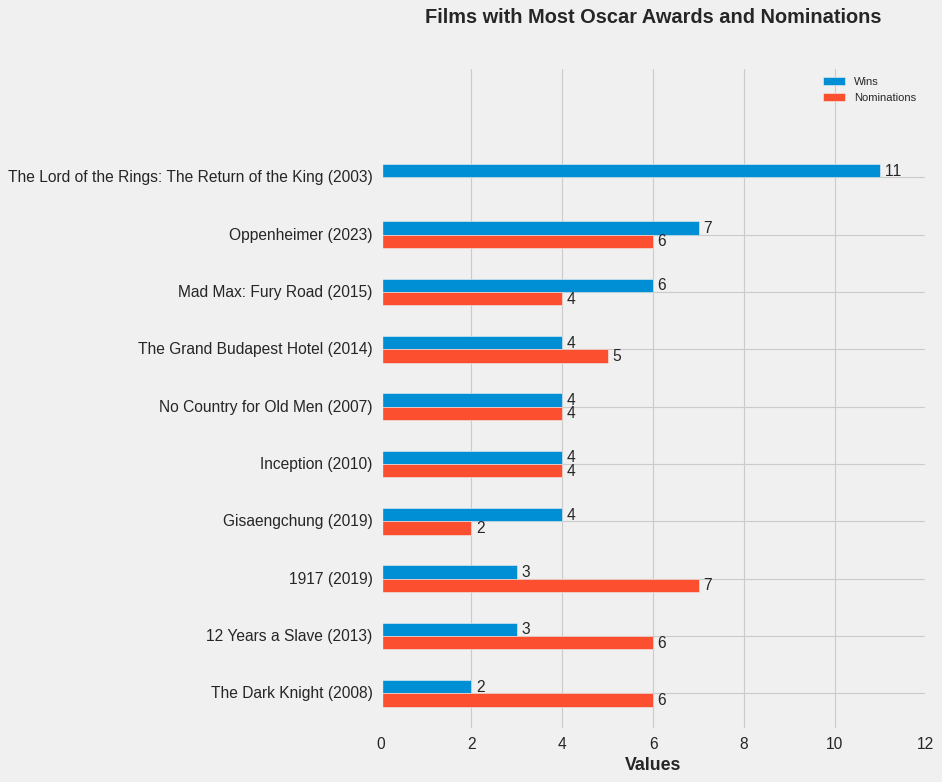

In [1704]:
categories = ['Wins', 'Nominations']

ax.barh(most_oscar_wins_noms["name"], most_oscar_wins_noms["prestigious_award_wins"], label='Wins')
ax.barh(most_oscar_wins_noms["name"], most_oscar_wins_noms["prestigious_award_nominations"], label='Nominations')

categories = ['Wins', 'Nominations']
n_categories = len(categories)
bar_width = 0.6
spacing = 2
index = np.arange(len(most_oscar_wins_noms["name"])) * (bar_width + spacing)

fig, ax = plt.subplots(figsize=(12, 10))

# Plot bars
wins = ax.barh(index - bar_width/2, most_oscar_wins_noms["prestigious_award_wins"], bar_width, label='Wins')
noms = ax.barh(index + bar_width/2, most_oscar_wins_noms["prestigious_award_nominations"], bar_width, label='Nominations')

# Add labels and titles
ax.set_yticks(index)
yticklabels = [f'{name} ({year})' for name, year in zip(most_oscar_wins_noms["name"], most_oscar_wins_noms["release_year"])]
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Values')
ax.set_title('Films with Most Oscar Awards and Nominations')
ax.legend()

ax.invert_yaxis()

for i, (win, nom) in enumerate(zip(most_oscar_wins_noms["prestigious_award_wins"], most_oscar_wins_noms["prestigious_award_nominations"])):
        if win:
            ax.text(win + 0.1, index[i] - bar_width/2, int(win), va='center')
        if nom:    
            ax.text(nom + 0.1, index[i] + bar_width/2, int(nom), va='center')



plt.savefig("most-oscar-awards-nominations.png")
plt.show()

## Gross

In [1510]:
def adjust_for_inflation(start: str, end: str, amount: int, country: str = "united-states") -> float:
    params = {
        "country": country,
        "start": start,
        "end": end,
        "amount": amount
    }
    url = "https://www.statbureau.org/calculate-inflation-price-json"
    res = httpx.get(url, params=params)
    if res.status_code == 200:
        return float(res.json().replace("$", "").replace(" ", ""))
    return None

In [1866]:
gross = data[["name", "gross_amount", "gross_currency", "release_year", "countries"]].copy().dropna()

In [1867]:
gross["decade"] = data["release_year"].apply(lambda x: (x // 10) * 10)

In [1868]:
gross["adjusted_for_inflation"] = gross\
.apply(lambda x: adjust_for_inflation(
    start=f"{x['release_year']}-01-01",
    end="2024-08-31",
    amount=x["gross_amount"],
), axis=1)

In [1548]:
gross_per_decade = gross.groupby("decade").agg({"gross_amount": "mean", "adjusted_for_inflation": "mean"})

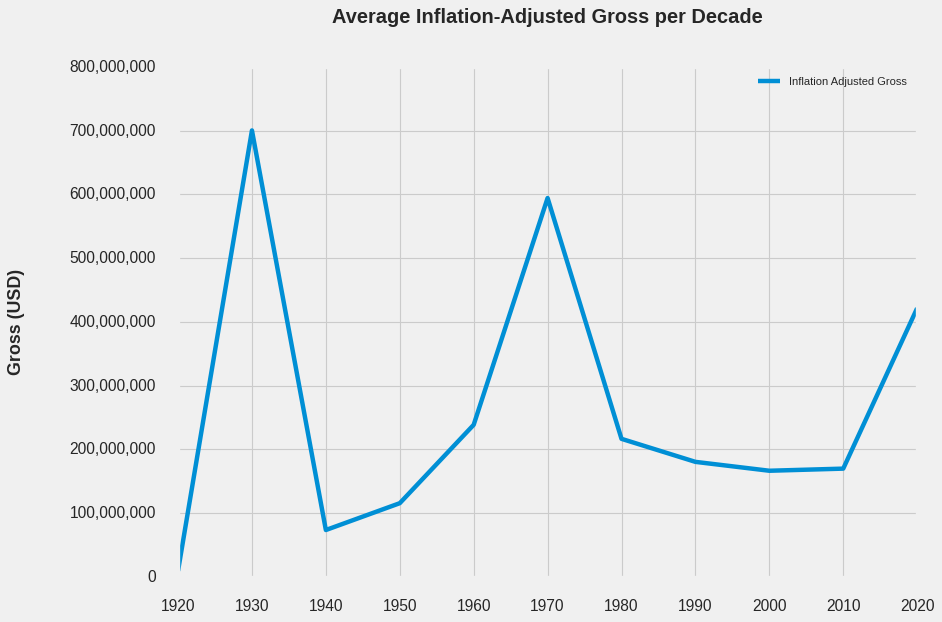

In [1813]:
fig, ax1 = plt.subplots(figsize=(12, 8))
adjusted_gross = ax1.plot(gross_per_decade.index.astype(int).astype(str), gross_per_decade["adjusted_for_inflation"], label="Inflation Adjusted Gross")

ax1.tick_params(axis='x', pad=20) 
ax1.tick_params(axis='y', pad=20)

ax1.legend(loc='upper right', ncol=1)

ax1.set_title("Average Inflation-Adjusted Gross per Decade")
ax1.set_ylabel("Gross (USD)", labelpad=40)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x:,.0f}"))

plt.savefig("gross-per-decade.png")
plt.show()

In [1810]:
gross.sort_values(by="adjusted_for_inflation", ascending=False).head(10)

,name,gross_amount,gross_currency,release_year,decade,adjusted_for_inflation
162,Gone with the Wind,200882193.0,USD,1939,1930,3.737471e+09
28,Star Wars,460998507.0,USD,1977,1970,2.063198e+09
226,The Exorcist,233005644.0,USD,1973,1970,1.428045e+09
199,Jaws,266567580.0,USD,1975,1970,1.337841e+09
233,The Sound of Music,159287539.0,USD,1965,1960,1.329816e+09
14,Star Wars: Episode V - The Empire Strikes Back,292753960.0,USD,1980,1980,9.941955e+08
115,The Sting,156000000.0,USD,1973,1970,9.560928e+08
77,Avengers: Endgame,858373000.0,USD,2019,2010,8.899462e+08
1,The Godfather,136381073.0,USD,1972,1970,8.643242e+08
92,Star Wars: Episode VI - Return of the Jedi,316566101.0,USD,1983,1980,8.448488e+08


## Top 250 Films with no major awards

In [1725]:
no_major_awards = data[data["prestigious_award_type"].isna()].sort_values(by="rating", ascending=False).head(10)

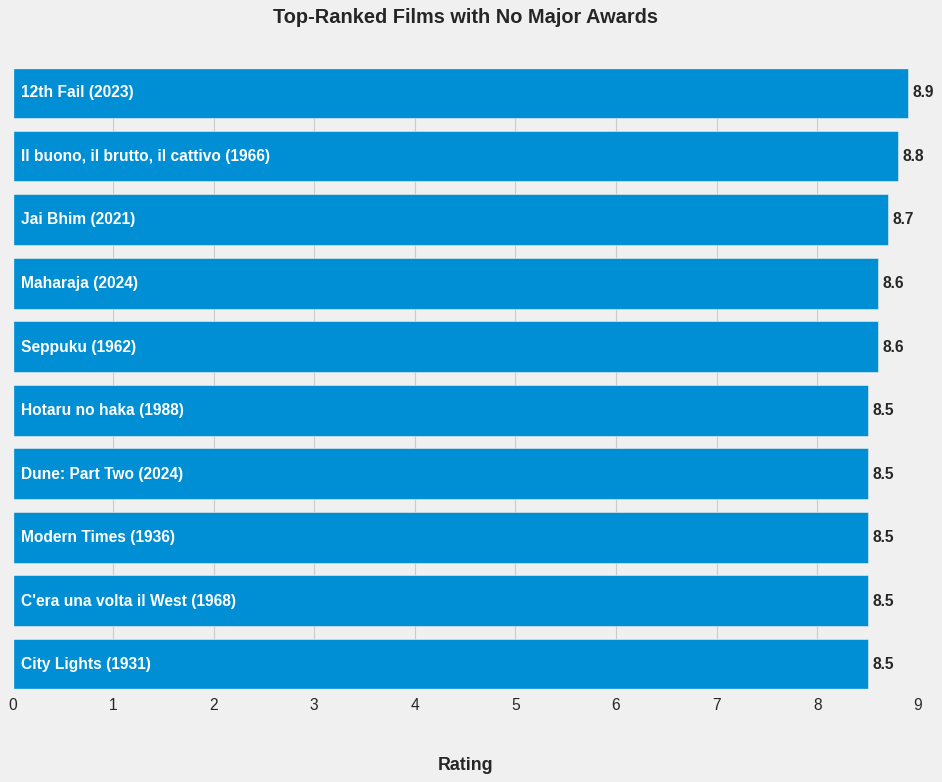

In [1744]:
fig, ax = plt.subplots(figsize=(12, 10))

bars = ax.barh(no_major_awards["name"], no_major_awards["rating"], label='Rating')

ax.set_xlabel('Rating', labelpad=40)
ax.set_yticks([])
ax.set_title('Top-Ranked Films with No Major Awards')
ax.invert_yaxis()

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{no_major_awards["name"].iloc[idx]} ({no_major_awards["release_year"].iloc[idx]})',
            ha="left", va="center",  
            color="white",
            fontweight='bold') 

    ax.text(width + 0.05,
            y_position,
            f'{no_major_awards["rating"].iloc[idx]}',
            ha="left", va="center",  
            fontweight='bold')

plt.savefig("no-major-awards.png")
plt.show()

## Geography

In [1880]:
data.iloc[1]["actors"]

"['Marlon Brando', 'Al Pacino', 'James Caan']"

In [1753]:
top_countries = data[["countries"]].value_counts().head(10)

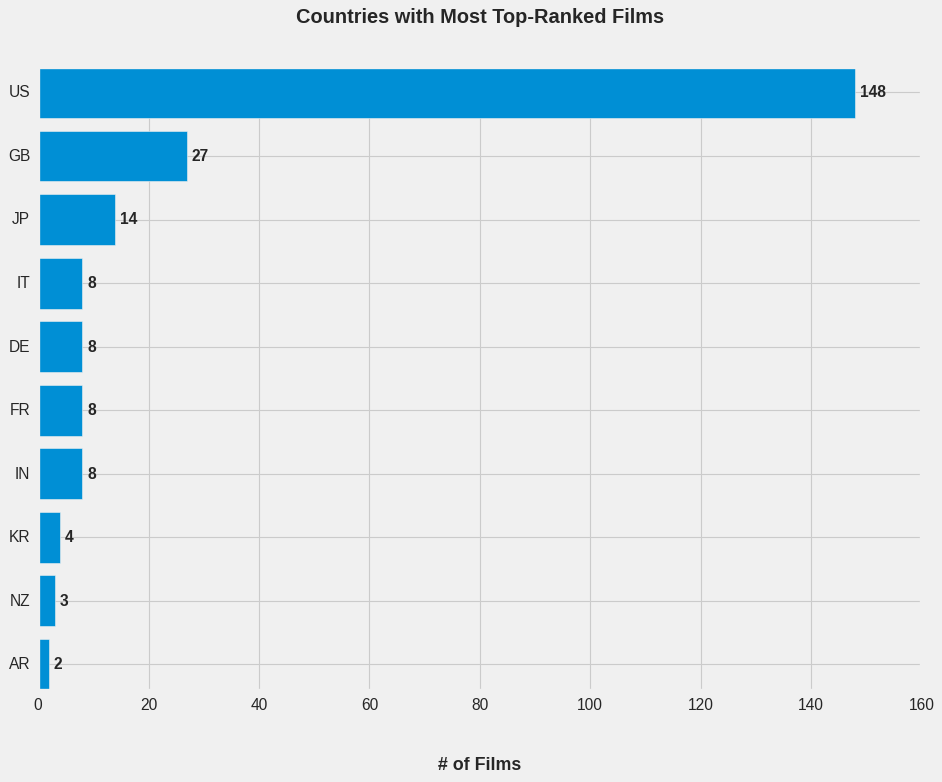

In [1858]:
fig, ax = plt.subplots(figsize=(12, 10))

bars = ax.barh([c[0] for c in top_countries.index], top_countries.values, label='# of Films')

ax.set_xlabel('# of Films', labelpad=40)
ax.set_title('Countries with Most Top-Ranked Films')
ax.invert_yaxis()

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2


    ax.text(width + 0.85,
            y_position,
            top_countries.values[idx],
            ha="left", va="center",  
            fontweight='bold')

plt.savefig("top-countries.svg")
plt.show()

In [1775]:
countries_most_awards = data.groupby("countries").agg({"wins": "sum", "nominations": "sum"})\
.sort_values(by=["wins", "nominations"], ascending=False)\
.head(10)

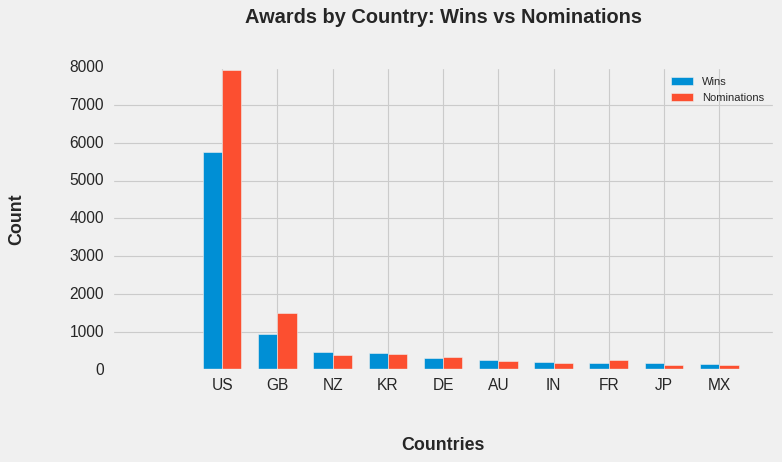

In [1796]:
# Bar width
bar_width = 0.35

# X locations for the groups
x = np.arange(len(countries_most_awards))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, countries_most_awards["wins"], bar_width, label='Wins')
bars2 = ax.bar(x + bar_width/2, countries_most_awards["nominations"], bar_width, label='Nominations')

# Labels, title, and custom x-axis tick labels
ax.set_xlabel('Countries', labelpad=40)
ax.set_ylabel('Count', labelpad=40)
ax.set_title('Awards by Country: Wins vs Nominations')
ax.set_xticks(x)
ax.set_xticklabels(countries_most_awards.index)
ax.legend()

# Display the chart
plt.tight_layout()
plt.savefig("awards-by-country.png")
plt.show()


In [1873]:
gross.groupby("countries").sum()["adjusted_for_inflation"].sort_values(ascending=False)

countries
US      4.241453e+10
GB      3.314469e+09
NZ      1.537281e+09
IT      5.192514e+08
DE      4.739632e+08
CA      2.035049e+08
AU      1.711412e+08
FR      1.545130e+08
JP      7.144437e+07
IE      6.234995e+07
KR      6.110443e+07
MX      5.819730e+07
XWG     3.467255e+07
IN      2.458102e+07
AR      1.139114e+07
BR      1.115079e+07
IR      9.970400e+06
AT      9.631457e+06
LB      1.755092e+06
DK      7.078893e+05
SUHH    1.778768e+05
Name: adjusted_for_inflation, dtype: float64

## Most Added to Watchlist

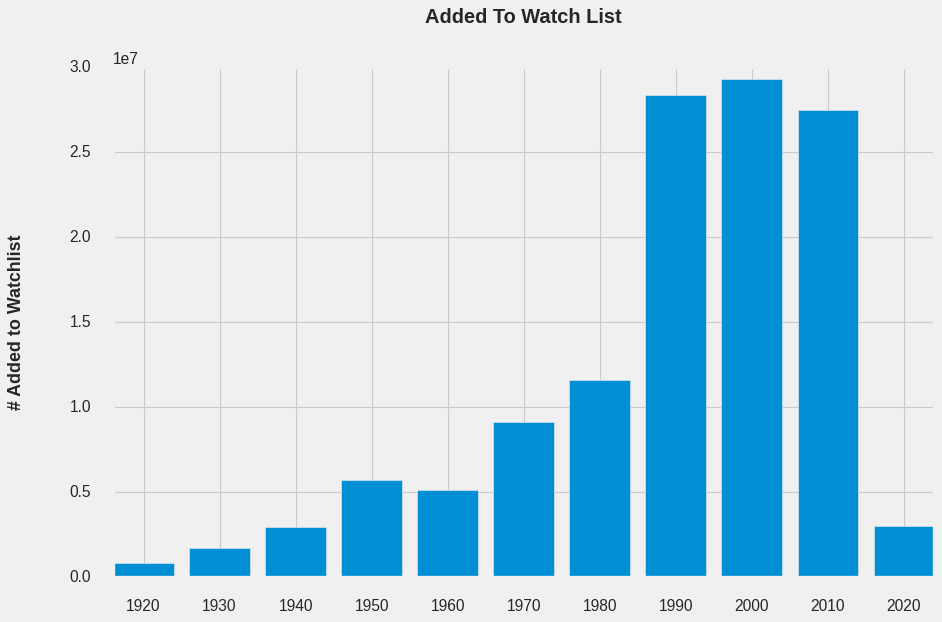

In [1331]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["added_by"], label="Added To Watchlist")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

plt.show()

## Reviews

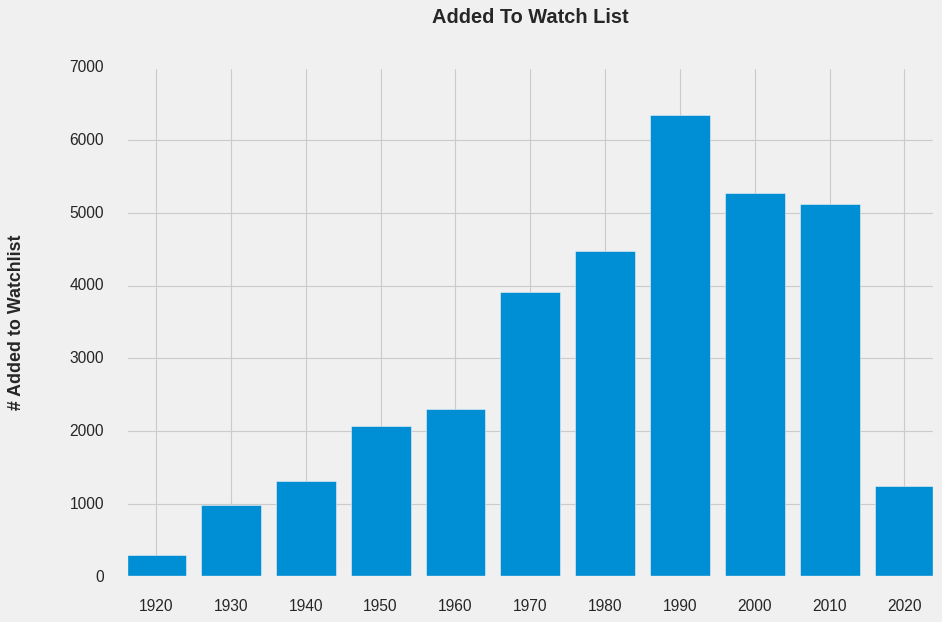

In [1334]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(decades_data.index.astype(int).astype(str), decades_data["reviews"], label="Reviews")

# ax2 = ax1.twinx()
# ratings = ax2.plot(decades_data.index.astype(int).astype(str), decades_data["rating"], c="orange", label="IMDB Rating")

ax1.tick_params(axis='x', pad=20)  
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Added To Watch List")
ax1.set_ylabel("# Added to Watchlist", labelpad=40)


plt.show()

## Production Companies

In [1397]:
exploded_productions = data.copy()

In [1398]:
exploded_productions["production"] = exploded_productions["production"].apply(literal_eval)

In [1399]:
exploded_productions = exploded_productions.explode("production")

In [1411]:
top_production_companies = exploded_productions.groupby("production").agg({
    "url": "count",
    "rating": "mean",
    "metascore": "mean",
    "wins": "sum",
    "nominations": "sum"
}).sort_values(by=["url", "rating"], ascending=False).head(10)

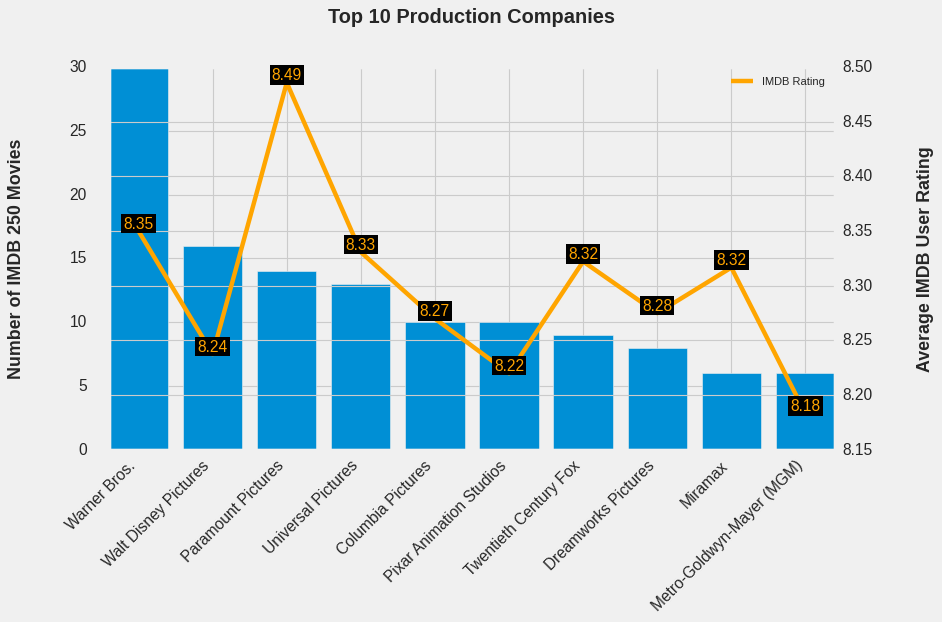

In [1437]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(top_production_companies.index, top_production_companies["url"], label="Production Company")
ax2 = ax1.twinx()
ratings = ax2.plot(top_production_companies.index, top_production_companies["rating"], c="orange", label="IMDB Rating")

ax1.set_xticks(range(len(top_production_companies.index)))
ax1.set_xticklabels(top_production_companies.index, rotation=45, ha="right")

ax1.tick_params(axis="x", rotation=45)
ax1.tick_params(axis='y', pad=20) 

ax1.set_title("Top 10 Production Companies")
ax1.set_ylabel("Number of IMDB 250 Movies", labelpad=40)
ax2.set_ylabel("Average IMDB User Rating", labelpad=40)

for x, y in zip(top_production_companies.index, top_production_companies["rating"]):
    ax2.text(
        x,
        y,
        f"{y:.2f}",
        va='bottom',
        ha='center',
        fontsize=14,
        color='orange',
        bbox=dict(facecolor='black', edgecolor='none', pad=2)
    )

ax2.legend(loc='upper right',)


plt.show()

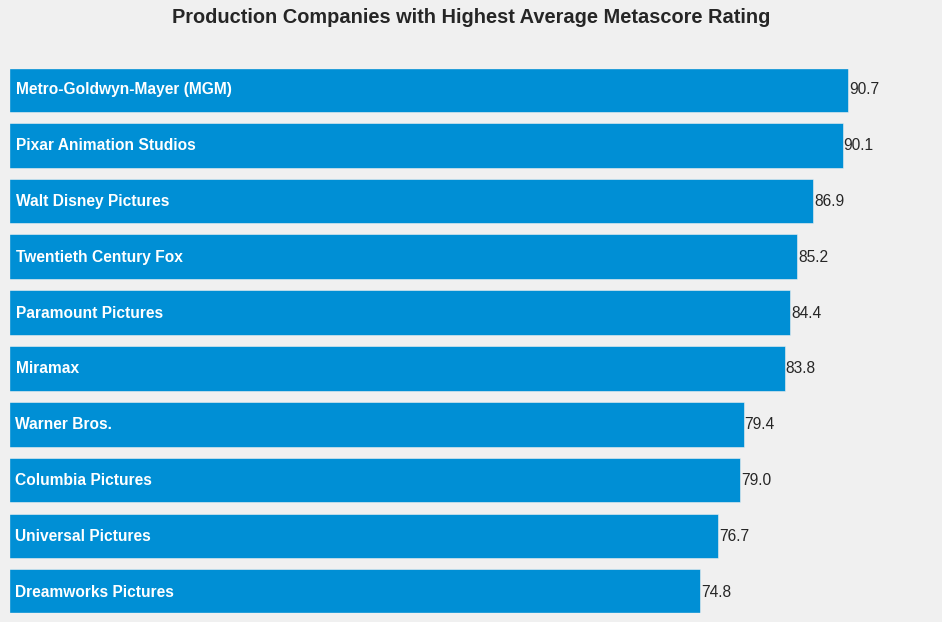

In [1454]:
top_production_companies_metascore = top_production_companies.sort_values(by="metascore", ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid(visible=False)
bars = ax.barh(top_production_companies_metascore.index, top_production_companies_metascore['metascore'])
ax.set_title("Production Companies with Highest Average Metascore Rating")
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

for idx, bar in enumerate(bars):
    width = bar.get_width()  
    y_position = bar.get_y() + bar.get_height() / 2
    
    ax.text(width * 0.01,
            y_position,
            f'{top_production_companies_metascore.index[idx]}',
            ha="left", va="center",  
            color="white",
            fontweight='bold')  

    ax.text(width + 0.1,     
            bar.get_y() + bar.get_height()/2.,  
            f'{top_production_companies_metascore["metascore"].iloc[idx]:.1f}',  
            ha="left", va="center")
    
    
plt.savefig("top-10-most-ratings.png")
plt.show()

In [1821]:
data[data["release_year"] == 1997]

,url,name,image,description,rating,rating_count,content_rating,genre,keywords,actors,...,release_date,rank,added_by,budget_amount,budget_currency,gross_amount,gross_currency,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
25,https://www.imdb.com/title/tt0118799/,La vita è bella,https://m.media-amazon.com/images/M/MV5BYmJmM2...,When an open-minded Jewish waiter and his son ...,8.6,752505,B,"['Comedy', 'Drama', 'Romance']","world war two,nazi occupation,tank,jewish,holo...","['Roberto Benigni', 'Nicoletta Braschi', 'Gior...",...,1997-12-20,26,708000,2.000000e+07,USD,57563264.0,USD,Oscar,3.0,4.0
80,https://www.imdb.com/title/tt0119217/,Good Will Hunting,https://m.media-amazon.com/images/M/MV5BOTI0Mz...,"Will Hunting, a janitor at MIT, has a gift for...",8.3,1089497,R,"['Drama', 'Romance']","professor,genius,mathematical genius,loss of w...","['Robin Williams', 'Matt Damon', 'Ben Affleck']",...,1998-01-09,81,767000,1.000000e+07,USD,138433435.0,USD,Oscar,2.0,7.0
81,https://www.imdb.com/title/tt0119698/,Mononoke-hime,https://m.media-amazon.com/images/M/MV5BNjM3NG...,On a journey to find the cure for a Tatarigami...,8.3,441446,PG-13,"['Animation', 'Action', 'Adventure']","forest,curse,princess,studio ghibli,giant wolf","['Yôji Matsuda', 'Yuriko Ishida', 'Yûko Tanaka']",...,1997-07-12,82,379000,2.400000e+09,JPY,4845631.0,USD,NaN,NaN,NaN
122,https://www.imdb.com/title/tt0119488/,L.A. Confidential,https://m.media-amazon.com/images/M/MV5BMDQ2Yz...,"As corruption grows in 1950s Los Angeles, thre...",8.2,624341,R,"['Crime', 'Drama', 'Mystery']","neo noir,1950s,murder,call girl,police detective","['Kevin Spacey', 'Russell Crowe', 'Guy Pearce']",...,1998-01-02,123,455000,3.500000e+07,USD,64616940.0,USD,Oscar,2.0,7.0
181,https://www.imdb.com/title/tt0118849/,Bacheha-Ye aseman,https://m.media-amazon.com/images/M/MV5BZTYwZW...,After a boy loses his sister&apos;s pair of sh...,8.2,82141,PG,"['Drama', 'Family', 'Sport']","lost shoe,brother sister relationship,tehran i...","['Mohammad Amir Naji', 'Amir Farrokh Hashemian...",...,NaT,182,131000,1.800000e+05,USD,933933.0,USD,Oscar,0.0,1.0


In [1831]:
exploded_productions[exploded_productions["production"] == "Syncopy"]

,url,name,image,description,rating,rating_count,content_rating,genre,keywords,actors,...,release_date,rank,added_by,budget_amount,budget_currency,gross_amount,gross_currency,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
2,https://www.imdb.com/title/tt0468569/,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,When the menace known as the Joker wreaks havo...,9.0,2914775,PG-13,"['Action', 'Crime', 'Drama']","psychopath,superhero,moral dilemma,clown,crimi...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",...,2008-07-25,3,1300000,185000000.0,USD,534987076.0,USD,Oscar,2.0,6.0
13,https://www.imdb.com/title/tt1375666/,Inception,https://m.media-amazon.com/images/M/MV5BMjAxMz...,A thief who steals corporate secrets through t...,8.8,2588276,PG-13,"['Action', 'Adventure', 'Sci-Fi']","dream,ambiguous ending,subconscious,mindbender...","['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",...,2010-07-23,14,1400000,160000000.0,USD,292587330.0,USD,Oscar,4.0,4.0
128,https://www.imdb.com/title/tt0372784/,Batman Begins,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,"After witnessing his parents&apos; death, Bruc...",8.2,1599348,PG-13,"['Action', 'Crime', 'Drama']","superhero,social decay,origin of hero,batman c...","['Christian Bale', 'Michael Caine', 'Ken Watan...",...,2005-06-17,129,719000,150000000.0,USD,206863479.0,USD,Oscar,0.0,1.0


## Directors

In [1849]:
directors = data.copy()
directors["director"] = directors["director"].apply(literal_eval)
directors = directors.explode("director")

In [1855]:
directors.groupby("director").agg({
    "name": "count",
    "wins": "sum",
    "nominations": "sum",
    "prestigious_award_type": "last",
    "prestigious_award_wins": "sum",
    "prestigious_award_nominations": "sum",
    
}).sort_values(by="name", ascending=False)

,name,wins,nominations,prestigious_award_type,prestigious_award_wins,prestigious_award_nominations
director,,,,,,
Christopher Nolan,8,838,1176,Oscar,14.0,26.0
Martin Scorsese,7,241,484,Oscar,7.0,22.0
Stanley Kubrick,7,80,92,Oscar,5.0,16.0
Steven Spielberg,7,293,265,Oscar,23.0,20.0
Akira Kurosawa,6,58,44,Oscar,1.0,8.0
...,...,...,...,...,...,...
John Carpenter,1,0,5,None,0.0,0.0
John Ford,1,10,6,Oscar,2.0,5.0
John G. Avildsen,1,22,23,Oscar,3.0,7.0
